In [1]:
#Author: Lars Daniel Johansson Niño
#Created date: 06/01/2026
#Purpose: To test the methods in MCMC

In [2]:
include("MCMC.jl")

N = 200 #200 study subjects. 
Mi = 4 #4 repetitions per subject. 
L = 6 #6 scalar covariates. 
Tn = 200 #200 knots. 
K = 7 #7 basis functions. 

simulated_data = sim_flfosr(N, Mi, L, Tn, K)

Simulating data using R's FLFOSR library...


Dict{String, Array} with 5 entries:
  "Y"          => [-0.115987 -0.352986 … 0.367219 0.182401; 0.244348 0.321174 ……
  "X"          => [1.0 -0.29945 … -0.150243 -0.606846; 1.0 -0.29945 … -0.150243…
  "M_rep"      => [4, 4, 4, 4, 4, 4, 4, 4, 4, 4  …  4, 4, 4, 4, 4, 4, 4, 4, 4, …
  "alpha_true" => [-0.0719665 0.343891 … -0.290909 -0.246558; -0.063934 0.3131 …
  "z"          => [1, 1, 1, 1, 2, 2, 2, 2, 3, 3  …  198, 198, 199, 199, 199, 19…

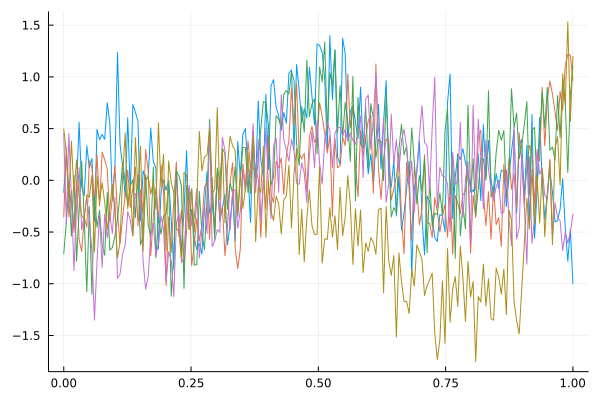

(200, 7)


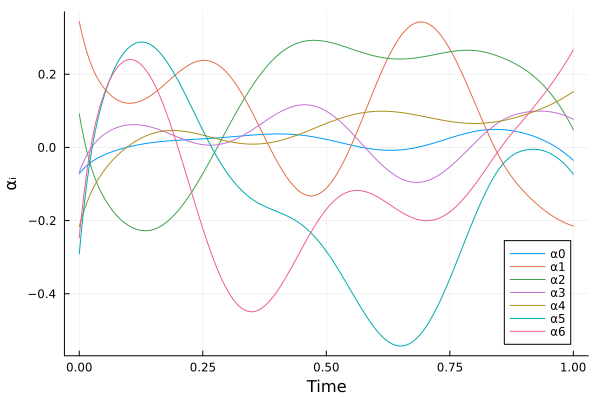

In [3]:
using Plots 

Y = simulated_data["Y"] #Gets all of the data (T x M)
X = simulated_data["X"]
M_rep = simulated_data["M_rep"]
plot_Y = plot( range(0,1 ,length = Tn) |> collect, Y[:, 1:5], legend = false)
display(plot_Y)


alpha_true = simulated_data["alpha_true"]

println(size(alpha_true))
legend_labels = ["α$(i-1)" for i in 1:8]

plot_alpha = plot(xlabel="Time", ylabel="αᵢ")

for i in 1:(L+1)
    plot!(plot_alpha,  range(0,1 ,length = Tn) |> collect, alpha_true[:, i], label = legend_labels[i])
end

display(plot_alpha)


In [4]:
my_output = flfosr(Y = Y, X = X, M_rep= M_rep)


┌ Warning: RCall.jl: Warning: package 'spikeSlabGAM' was built under R version 4.4.3
└ @ RCall C:\Users\End User\.julia\packages\RCall\JIY9I\src\io.jl:171


On iteration 200 from 2000
On iteration 400 from 2000
On iteration 600 from 2000
On iteration 800 from 2000
On iteration 1000 from 2000
On iteration 1200 from 2000
On iteration 1400 from 2000
On iteration 1600 from 2000
On iteration 1800 from 2000
On iteration 2000 from 2000


Dict{String, Array{Float64}} with 10 entries:
  "B"              => [0.0707107 -0.121864 … -0.29309 0.290768; 0.0707107 -0.12…
  "alpha_post"     => [0.216752 1.22226 … -1.73892 -1.38875; 0.0932318 -0.91873…
  "X"              => [1.0 -0.29945 … -0.150243 -0.606846; 1.0 -0.29945 … -0.15…
  "ga_post"        => [-0.965465 -2.41336 … -0.693344 -0.955705; -0.0776548 -0.…
  "w_post"         => [0.989253 -0.867096 … -2.10376 -0.93008; -1.60862 0.76931…
  "sig_gamma_post" => [0.679502, 0.675892, 0.667425, 0.697312, 0.674058, 0.6609…
  "sig_omega_post" => [1.36745 0.735268 … 1.83049 1.46424; 0.966081 0.776244 … …
  "sig_eps_post"   => [0.101075, 0.100999, 0.101273, 0.1007, 0.101401, 0.101677…
  "alpha_postf"    => [-0.0832236 0.2901 … -0.259423 -0.232257; -0.0772841 0.26…
  "sig_alpha_post" => [0.0325529 0.0837061 … 0.0267065 0.0223995; 0.594137 1.35…

(200, 7, 1000)
Plots.Plot{Plots.GRBackend}
Plots.Plot{Plots.GRBackend}
Plots.Plot{Plots.GRBackend}
Plots.Plot{Plots.GRBackend}
Plots.Plot{Plots.GRBackend}
Plots.Plot{Plots.GRBackend}
Plots.Plot{Plots.GRBackend}


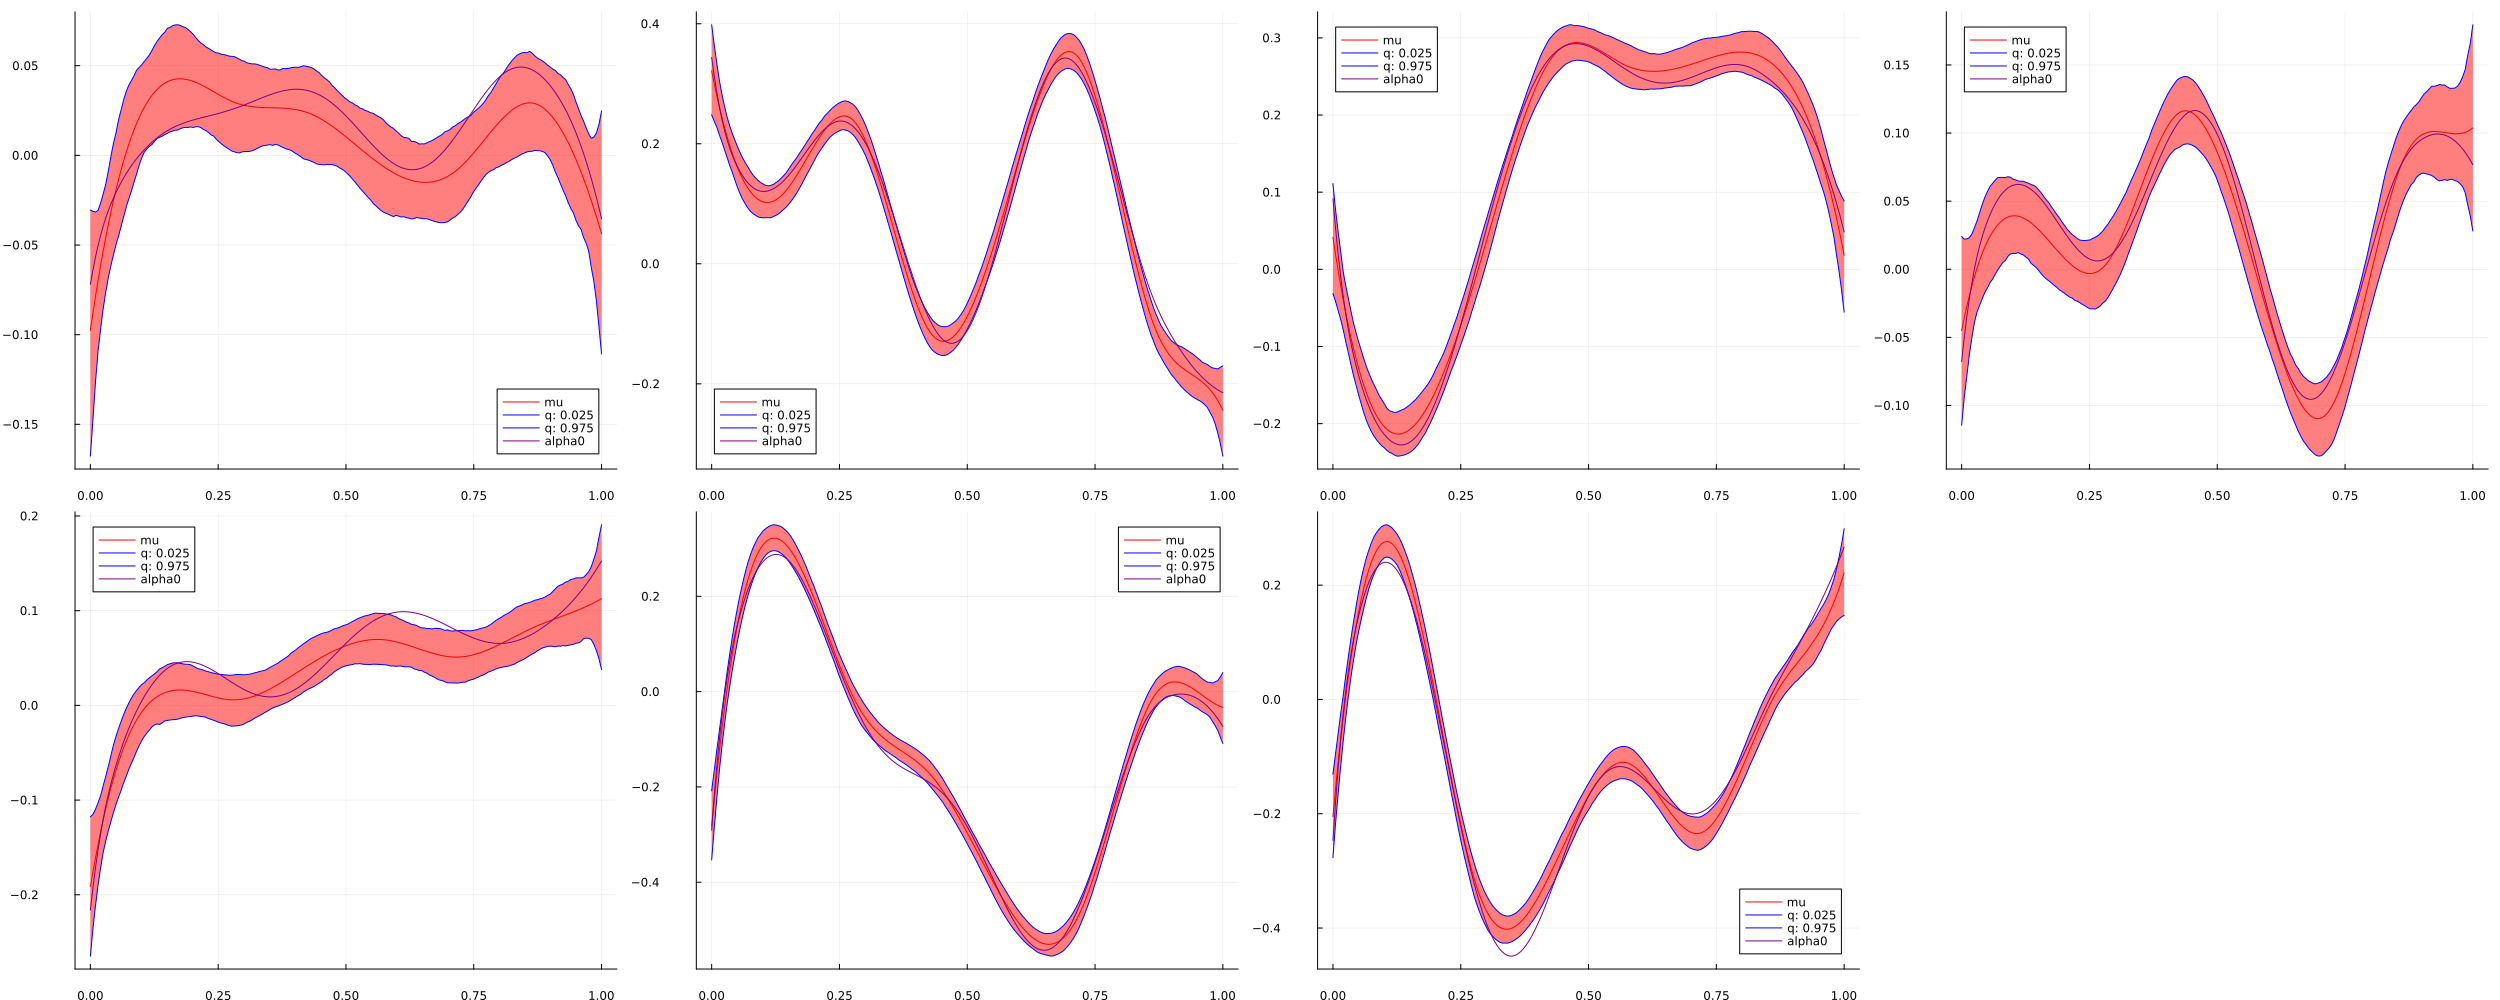

In [5]:
include("VizUtils.jl")

alpha_postf = my_output["alpha_postf"]
println(size(alpha_postf))

alpha_plot_grid = []

for i in 1:7
    p = plotf_mean_q(alpha_postf[:, i, :]    )
    println(typeof(p))
    p = plot(p,  range(0,1 ,length = Tn) |> collect, alpha_true[:, i], label = "alpha0", color = "purple")
    push!(alpha_plot_grid, p)
end

plot(alpha_plot_grid..., layout = (2,4), size=(2500,1000) )